In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json, shutil
from pathlib import Path
import math
import scipy
from math import sqrt, log, pi, exp, sinh
from scipy.optimize import curve_fit, leastsq
import matplotlib.gridspec as gridspec
from scipy.signal import argrelextrema
from scipy.interpolate import UnivariateSpline
from scipy.signal import lfilter
from scipy.signal import savgol_filter
import os.path
from os import path
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 8.0]})
workdir=%pwd
print (workdir)

/Users/coralie/Desktop/Move/SI-Lipase-Structure-Factors/manybody/noswap


## Plot system energy

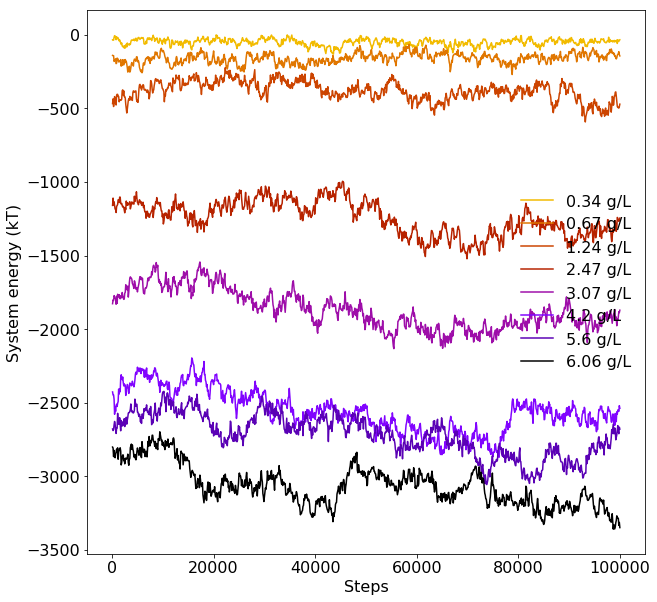

In [9]:
%cd -q $workdir/data
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series2"
structure = "closed"
epslj = 0.05
epshh = 0.61
dp = 0


for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
    elif C == 0.67:
        col = '#e07600'
    elif C == 1.24:
        col = '#cc4400'
    elif C == 2.47:
        col = '#b72300'
    elif C == 3.07:
        col = '#9e0ea9'
    elif C == 4.2:
        col = '#8104ff'
    elif C == 5.6:
        col = '#5a01b5'
    elif C == 6.06:
        col='black'
    pfx = str(series)+'-'+str(structure)+'-h'+str(epshh)+'-e'+str(epslj)+'-C'+str(C)+'-dp'+str(dp)
    %cd -q $pfx
    t,e = np.loadtxt("energy.dat",usecols=(0,1),unpack=True)
    plt.plot(t,e,label=str(C)+' g/L')
    plt.xlabel("Steps")
    plt.ylabel("System energy (kT)")
    plt.legend(frameon=False)

    %cd -q '..'
            
#plt.savefig('energy-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight')        
            
%cd -q $workdir

## Plot S(q)

Missing data for series2-closed-h0.61-e0.05-C6.06-dp2


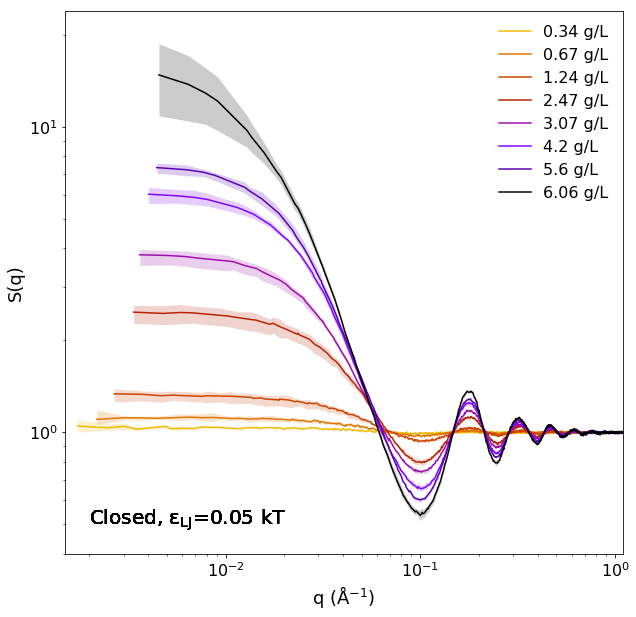

In [11]:
%cd -q $workdir/data

serie = "series2"
conf = "closed"
epslj = 0.05
epshh = 0.61

for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
    elif C == 0.67:
        col = '#e07600'
    elif C == 1.24:
        col = '#cc4400'
    elif C == 2.47:
        col = '#b72300'
    elif C == 3.07:
        col = '#9e0ea9'
    elif C == 4.2:
        col = '#8104ff'
    elif C == 5.6:
        col = '#5a01b5'
    elif C == 6.06:
        col='black'

    nriter = 0
    smoy = [0] * 600
    qmoy = [0] * 600
    smax = [0] * 600
    smin = [1000] * 600
    for dp in [0,1,2]:
        pfx = str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+"-dp"+str(dp)
        %cd -q $pfx
        if path.exists("debye_n2.dat"):
            q,s = np.loadtxt("debye_n2.dat", unpack=True)
            nriter = nriter + 1   
            for i in np.arange(0,len(q),1):
                qmoy[i] = q[i]
                smoy[i] = smoy[i] + s[i]
                if smax[i] < s[i]:
                    smax[i] = s[i]
                if smin[i] > s[i]:
                    smin[i] = s[i]                    
        else:
            print("Missing data for", pfx)
        %cd -q '..' 
 
    for i in np.arange(0,len(q),1):
        smoy[i] = smoy[i]/nriter

    plt.plot(qmoy,smoy,color=col,label=str(C)+" g/L")
    plt.fill_between(qmoy,smin,smax,interpolate=True, color=col, alpha=0.2, lw=0)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.4,24)
    plt.xlim(0.0015,1.1)
    plt.xlabel("q ("r'${\rm{\AA}^{-1}}$'")", fontsize=18)
    plt.ylabel("S(q)", fontsize=18)
    plt.text(0.002, 0.5, "Closed, "r'${\rm{\varepsilon_{LJ}}}$'"=0.05 kT", fontsize=20)
    plt.legend(frameon=False, loc=1)
    #np.savetxt(str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+'_moy.dat',np.transpose((qmoy,smoy)))
    #plt.savefig("sq_tll_open_0-005.pdf", bbox_inches='tight')

%cd -q $workdir

## Plot g(r)

Missing data for series2-closed-h0.61-e0.05-C6.06-dp2


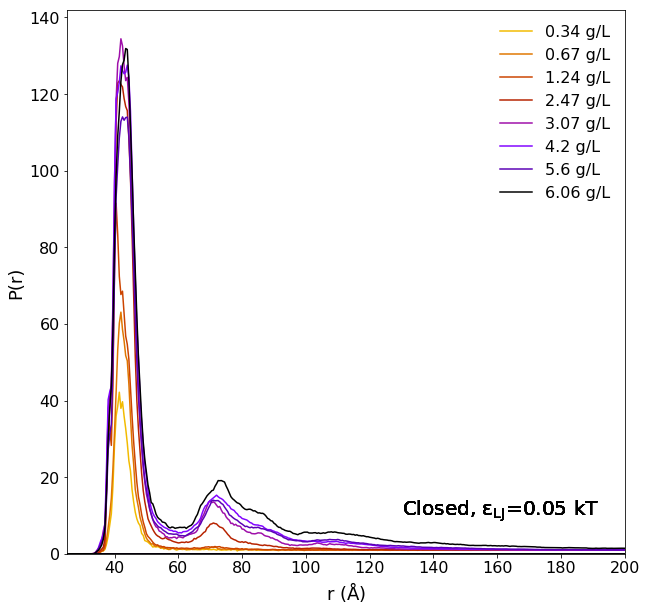

In [32]:
%cd -q $workdir/data

serie = "series2"
conf = "closed"
epslj = 0.05
epshh = 0.61

for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
    elif C == 0.67:
        col = '#e07600'
    elif C == 1.24:
        col = '#cc4400'
    elif C == 2.47:
        col = '#b72300'
    elif C == 3.07:
        col = '#9e0ea9'
    elif C == 4.2:
        col = '#8104ff'
    elif C == 5.6:
        col = '#5a01b5'
    elif C == 6.06:
        col='black'

    nriter = 0
    pmoy = [0] * 7000
    rmoy = [0] * 7000
    pmax = [0] * 7000
    pmin = [1000] * 7000
    for dp in [0,1,2]:
        pfx = str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+"-dp"+str(dp)
        %cd -q $pfx
        if path.exists("rdf.dat"):
            r,p = np.loadtxt("rdf.dat", unpack=True)
            nriter = nriter + 1   
            for i in np.arange(0,len(r),1):
                rmoy[i] = r[i]
                pmoy[i] = pmoy[i] + p[i]
                if pmax[i] < p[i]:
                    pmax[i] = p[i]
                if pmin[i] > p[i]:
                    pmin[i] = p[i]                    
        else:
            print("Missing data for", pfx)
        %cd -q '..' 
 
    for i in np.arange(0,len(r),1):
        pmoy[i] = pmoy[i]/nriter

    plt.plot(rmoy,pmoy,color=col,label=str(C)+" g/L")
    plt.ylim(0.0,max(pmoy)+10)
    plt.xlim(25,200)
    plt.xlabel("r ("r'${\rm{\AA}}$'")", fontsize=18)
    plt.ylabel("P(r)", fontsize=18)
    plt.text(130,10, "Closed, "r'${\rm{\varepsilon_{LJ}}}$'"=0.05 kT", fontsize=20)
    plt.legend(frameon=False, loc=1)

%cd -q $workdir

In [ ]:
## Done until here

## Regression for S(0)

In [ ]:
%cd -q $workdir
from scipy import stats
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series2"
structure = "open"


if series=="series1_T2":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t2.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t2.aam"

if series=="series1_T3":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t3.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t3.aam"

if series=="series1_R20":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../1du4_R20.aam"

if series=="series2":
    conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6] #, 6.06] 
    Mw = 29609.61
    if structure=="closed":
        macromolecule = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule = "../1ein_open.aam"    
        
l1 = [0.485]
l2 = [0.005]     


for epsHH_kT in l1: 
    for eps_kT in l2:
        for mod in [0]:
            conclist = []
            invs0list = []
            for Cp in conc_range:
                q_range = []
                s_range = []
                s_linreg = []
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                %cd -q $pfx
                q0,s0 = np.loadtxt("debye_n2.dat",usecols=(0,1), unpack=True, skiprows=1)
                for i in np.arange(0,len(q0)):
                    if q0[i] < 0.046 and q0[i] > 0.0:
                        q_range.append(q0[i])
                        s_range.append(s0[i])

                plt.plot(q_range, s_range, ms=7, marker='o',ls='None',label=str(Cp)+" g/L")

                %cd -q '..'

            plt.gca().set_prop_cycle(None)
            plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


for epsHH_kT in l1: 
    for eps_kT in l2:
        for mod in [0]:
            interceptlist = []
            conclist = []
            invs0list = []
            for Cp in conc_range:
                q_range = []
                s_range = []
                s_linreg = []
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                %cd -q $pfx
                q0,s0 = np.loadtxt("debye_n2.dat",usecols=(0,1),unpack=True)
                for i in np.arange(0,len(q0)):
                    if q0[i] < 0.046 and q0[i] > 0.0:      #0.03-0.046 Guinier region (plutot 0.03-0.07?) 0.03
                        q_range.append(q0[i])
                        s_range.append(s0[i])

                slope, intercept, r_value, p_value, std_err = stats.linregress(q_range,s_range)
                interceptlist.append(intercept)
                invs0list.append(1/intercept)
                conclist.append(Cp)
                print(Cp, "r2=", r_value**2)
                for j in np.arange(0,len(q_range)):
                    s_linreg.append(q_range[j]*float(slope)+float(intercept))

                plt.plot(q_range, s_linreg,ls='-',marker='None', lw=1.5)
                plt.xlabel("$q$ (1/Å)", size=20)
                plt.ylabel("$S(q)$", size=20)
                plt.tick_params(axis='both', which='major', labelsize=20)
                #plt.title("TLL,"+str(structure)+", "+r"$\varepsilon_{LJ} = 0.05 kT$"+", "+r"$\varepsilon_{H-H} = 0.61 kT$",size=20,y=1.02)
                #plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1,0.5),fontsize=20)
                plt.legend(frameon=False)
                plt.title(str(title)+", "+r"$\varepsilon_{H-H}$ = "+str(epsHH_kT)+" $kT$, "+r"$\varepsilon_{LJ}$ = "+str(eps_kT)+" $kT$")

                %cd -q '..'

        np.savetxt(str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'_intercepts.dat',np.transpose((conclist,invs0list)))
        #plt.savefig('reg-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'.pdf', bbox_inches='tight') 

%cd -q $workdir